#  Feature analysis in MPSC

## 1. load and check data

### 1.1 load data first

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# load data
train = pd.read_csv('./data/train.tsv',delimiter='\t', dtype={'item_description': str})
test = pd.read_csv('./data/test.tsv',delimiter='\t', dtype={'item_description': str})
# concat train and test
train = train.fillna(np.nan)
dataset = pd.concat([train, test]).reset_index(drop=True)

### 1.2 check some general informations

In [2]:
print(dataset.shape)
print(dataset.isnull().sum())

(2175894, 9)
brand_name            928207
category_name           9385
item_condition_id          0
item_description           4
name                       0
price                 693359
shipping                   0
test_id              1482535
train_id              693359
dtype: int64


In [15]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [22]:
test.isnull().sum()

test_id                   0
name                      0
item_condition_id         0
category_name          3058
brand_name           295525
shipping                  0
item_description          0
dtype: int64

In [35]:
train.head(8)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...


In [23]:
# Summarie and statistics
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


## 2. Feature analysis

### 2.1 Numerical values

Numerical values include item_condition_id, shipping and price (not considering train_id)

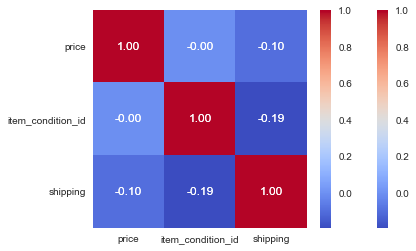

In [27]:
# Correlation matrix between numerical values (item_condition_id, shipping) and price
g = sns.heatmap(train[["price","item_condition_id","shipping"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

It seems like item_condition_id is uncorrelated with price ,but we can't drop it simply. Let's discover it later.

#### 2.1.1 price

In [33]:
# the number of price
i = train["price"].value_counts().size
print('We have', i, 'different price.') 

We have 828 different price.


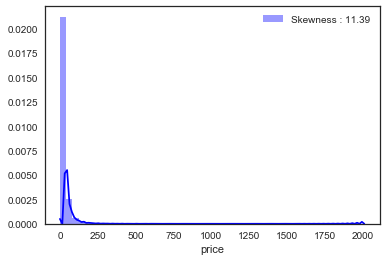

In [45]:
# Explore price distribution 
g = sns.distplot(train["price"], color="b", label="Skewness : %.2f"%(train["price"].skew()))
g = g.legend(loc="best")
plt.show()

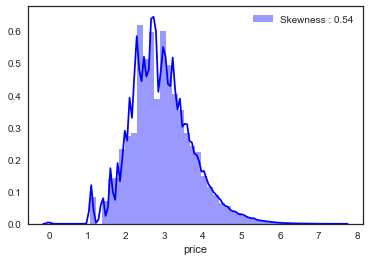

In [25]:
# Apply log to Price to explore distribution
logPrice = train["price"].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.distplot(logPrice, color="b", label="Skewness : %.2f"%(logPrice.skew()))
g = g.legend(loc="best")
plt.show()

#### 2.1.2 item_condition_id

In [29]:
train["item_condition_id"].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

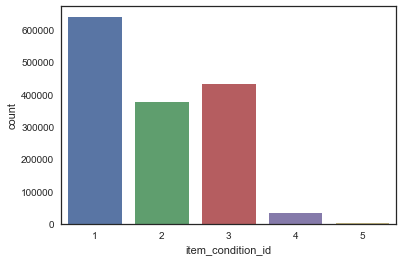

In [51]:
sns.countplot(x='item_condition_id', data=train)
plt.show()

#### 2.1.3 shipping

In [34]:
train["shipping"].value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

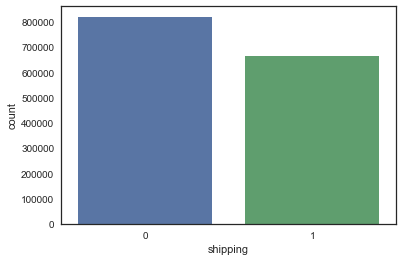

In [52]:
sns.countplot(x='shipping', data=train)
plt.show()

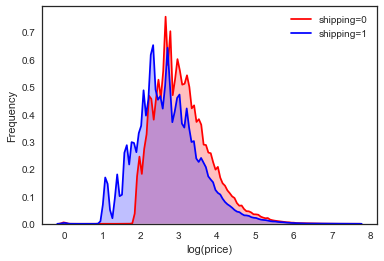

In [29]:
# Explore shipping vs log(price)
g = sns.kdeplot(logPrice[(train["shipping"] == 0) & (logPrice.notnull())], color="Red", shade = True)
g = sns.kdeplot(logPrice[(train["shipping"] == 1) & (logPrice.notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("log(price)")
g.set_ylabel("Frequency")
g = g.legend(["shipping=0","shipping=1"])
plt.show(g)

It shows that the average price paid by users who have to pay for shipping fees is lower than those that don't require additional shipping cost. It matches the reality.

### 2.2 Categorical values

Categorical values include name, category_name brand_name and item_description

#### 2.2.1 brand_name

In [37]:
values = train['brand_name'].value_counts()
print(values.shape, '\n', values[:8])

(4809,) 
 PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
FOREVER 21           15186
Nintendo             15007
Lululemon            14558
Name: brand_name, dtype: int64


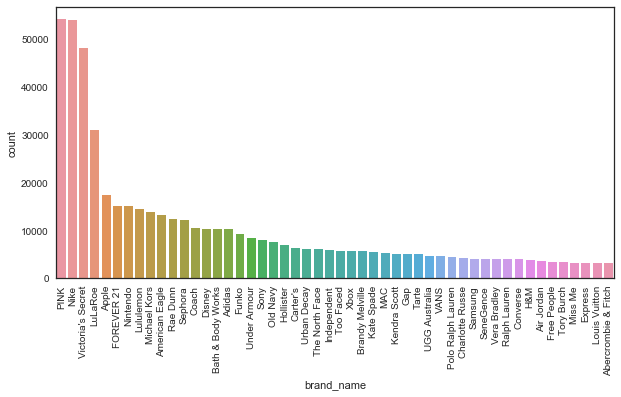

In [13]:
plt.figure(figsize=(10,5))
g = sns.countplot(x="brand_name",data=train[train['brand_name'].isin(values.index[:50])],order=list(values.index[:50]))
g = plt.setp(g.get_xticklabels(), rotation=90) 
plt.show()

#### 2.2.2 name & item_description

In [18]:
# randomly print 10 names
for i in range(10):
    print(i, ':', train['name'].sample(1).iloc[0])

0 : Free ship 30 oz yeti
1 : Fossil watch
2 : Plus Size Tunic for Loveabargain
3 : Eyebrow pencil liner Brown
4 : MAC Bundle
5 : Lebron James Soldier XI
6 : Super waluigi odyssey
7 : Butterfly Ashley Stewart Sz46DDD Bra EUC
8 : NWT Vs Pink Halloween Tee & Boyshort S
9 : Victoria's Secret PINK Medium bundle


In [19]:
# randomly print 10 descriptions
for i in range(10):
    print(i, ':', train['item_description'].sample(1).iloc[0])

0 : Brand new, super soft shea infused socks
1 : Perfect beach bag! Colorful striped pattern. Very large and inside can store wet towels and such because of the material. Inside pocket.
2 : In Great Condition Includes All
3 : Worn few times
4 : Aztec print Solid dark gray
5 : I bought these to cut into High waisted shorts and I never ended up doing it.
6 : Brand new from Home Goods! Adorable Joie Ribbit sink strainer features a friendly frog middle and is BPA-free. Received for Christmas, but have no use for it! Bundle to save on shipping!
7 : Authentic Kate Spade wallet. Only a few months old! I got it as a gift and hardly used it. Comes with tags. Retails for [rm] and only asking [rm]
8 : 2 variant editions: marvel Collectors Corps Ant-man 005 Last days of Ant-man 001
9 : NWOT


#### 2.2.3 category_name

In [11]:
# TOP 8 category_name
print(train['category_name'].value_counts().shape)
train['category_name'].value_counts()[:8]

(1287,)


Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Name: category_name, dtype: int64

In [8]:
train['category_name'].str.contains('/').fillna(False).value_counts()

True     1476208
False       6327
Name: category_name, dtype: int64

6327刚好是缺失的数目，这说明category_name中每一个都包含字符'/'

In [12]:
# generator three features general_cat,subcat_1 and subcat_2 from category_name
def split_cat(text):
    try: return text.split("/", 2)
    except: return ("NoLabel", "NoLabel", "NoLabel")
    
# zip返回一个元祖列表，该元祖按顺序包含每个序列的相应元素，以最小的一个为准。* 用来传递任意个无名字参数，这些参数会一个Tuple的形式访问
train['subcat_1'], train['subcat_2'], train['subcat_3'] = zip(*train['category_name'].apply(lambda x: split_cat(x))) 

##### 2.2.3.1 subcat_1

In [15]:
values = train['subcat_1'].value_counts()
print(values)

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
NoLabel                     6327
Name: subcat_1, dtype: int64


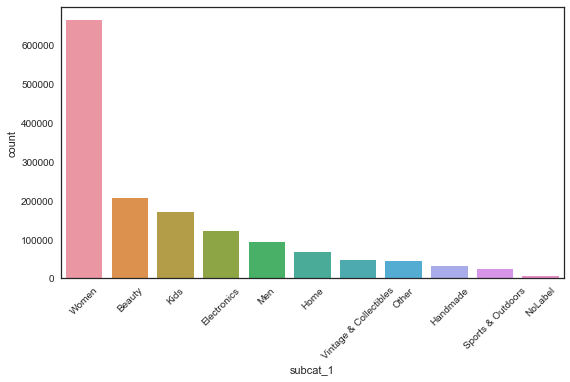

In [18]:
plt.figure(figsize=(9,5))
g = sns.countplot(x="subcat_1",data=train,order=list(values.index))
g = plt.setp(g.get_xticklabels(), rotation=45) 
plt.show()

##### 2.2.3.2 subcat_2

In [19]:
values = train['subcat_2'].value_counts()
print(values.shape, '\n', values[:8])

(114,) 
 Athletic Apparel             134383
Makeup                       124624
Tops & Blouses               106960
Shoes                        100452
Jewelry                       61763
Toys                          58158
Cell Phones & Accessories     53290
Women's Handbags              45862
Name: subcat_2, dtype: int64


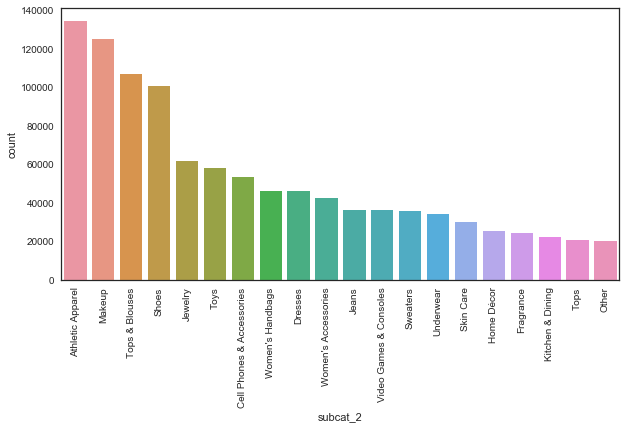

In [20]:
# top 20
plt.figure(figsize=(10,5))
g = sns.countplot(x="subcat_2",data=train[train['subcat_2'].isin(values.index[:20])],order=list(values.index[:20]))
g = plt.setp(g.get_xticklabels(), rotation=90) 
plt.show()

##### 2.2.3.3 subcat_3

In [21]:
values = train['subcat_3'].value_counts()
print(values.shape, '\n', values[:8])

(872,) 
 Pants, Tights, Leggings    60177
Other                      50224
Face                       50171
T-Shirts                   46380
Shoes                      32168
Games                      30906
Lips                       30871
Athletic                   27059
Name: subcat_3, dtype: int64


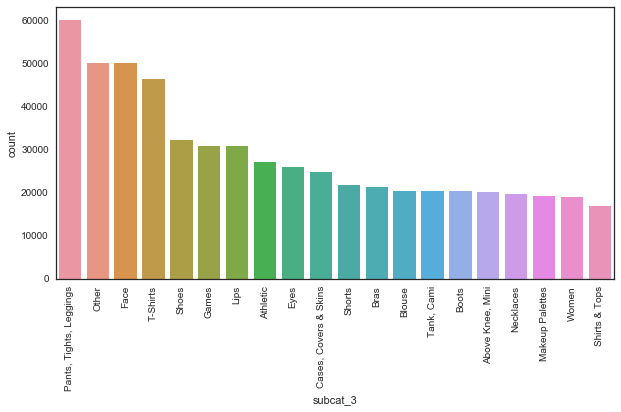

In [22]:
# top 20
plt.figure(figsize=(10,5))
g = sns.countplot(x="subcat_3",data=train[train['subcat_3'].isin(values.index[:20])],order=list(values.index[:20]))
g = plt.setp(g.get_xticklabels(), rotation=90) 
plt.show()